In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# function
f = lambda x: x**2 + 0.3 * x + 5.0

In [4]:
x_train = np.linspace(-1, 1, 50)
fx = f(x_train)

In [5]:
np.random.seed(320)
y_train = fx + 0.3 * np.random.rand(len(x_train))

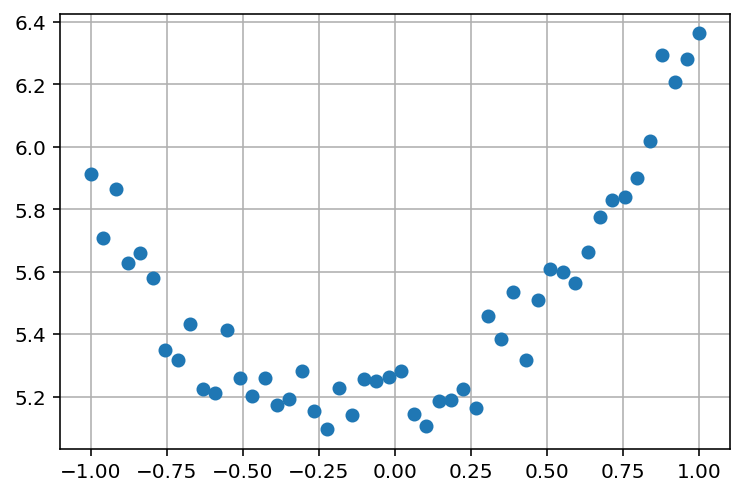

In [6]:
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [7]:
W = tf.Variable(np.array([[-1.0, -1.0, -1.0]]), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

loss = tf.reduce_mean(tf.square(tf.matmul(W, x) - y))

batch_size = 10
lr = 0.01
MaxEpochs = 1000
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

feature_train = np.array([[xval**2, xval, 1] for xval in x_train]).T
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 100 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x: feature_train, y: y_train})
            print(epoch, curr_w, curr_loss)
        sess.run(train, feed_dict={x: feature_train, y: y_train})
        
    w_tf_sgd1 = sess.run(W)

0 [[-1. -1. -1.]] 47.673477
100 [[ 1.0001713  -0.36488652  4.4420304 ]] 0.63747185
200 [[ 1.1618533  -0.04832806  5.0091887 ]] 0.052224018
300 [[1.143611   0.10945351 5.0798063 ]] 0.019726615
400 [[1.1125499  0.18809624 5.0980387 ]] 0.012003115
500 [[1.0847601  0.22729403 5.1092305 ]] 0.00951154
600 [[1.0611571  0.24683127 5.118246  ]] 0.008476522
700 [[1.0412304  0.25656924 5.125809  ]] 0.00792326
800 [[1.0244193  0.26142296 5.1321836 ]] 0.0075750994
900 [[1.0102389 0.2638422 5.1375604]] 0.0073386617


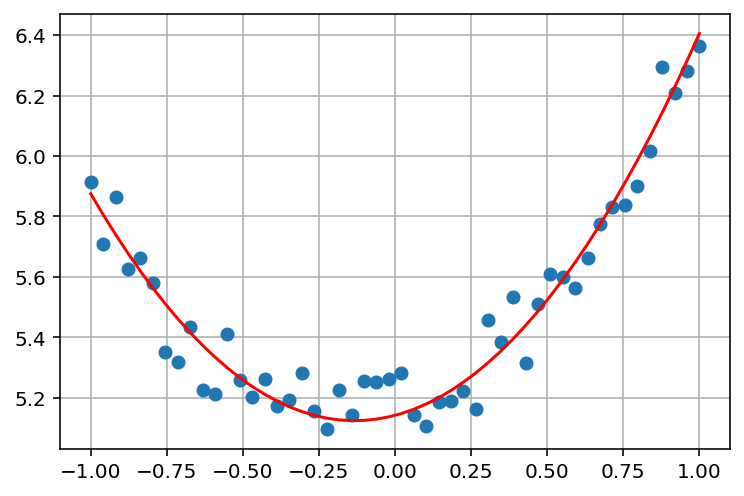

In [9]:
feature_train = np.array([[xval**2, xval, 1] for xval in x_train]).T
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(w_tf_sgd1, feature_train).flatten(), 'r-')
plt.grid()
plt.show()